# WORLD GDP PROJECT

This dataset is from kaggle named 'Countries of the world' uploaded by Fernando Lasso. The link to the dataset is :
https://www.kaggle.com/fernandol/countries-of-the-world)

## Project Goal

The Goal of the project is to understand this dataset, geting insights from it and finally performing regression task on it to predict GDP of a country based on parameters like population, area, region, net migration etc.

The dataset comprises of 227 countries's GDP and other 20 parameters as their columns. The dataset has :

1. Categorical values : - One hot encoding
2. Numerical values : - Have to be transformed into gaussian bell shape if they are highly skewed.
3. Null values : Have to be imputed depending on the region or Continent.

In [612]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew,norm
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

# Data Import

In [743]:
data=pd.read_csv('countries of the world.csv')

### Show data header

In [744]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


### Data shape

In [745]:
data.shape

(227, 20)

### Data information

In [746]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

So we observe, that only "Country" and "Region" are categorical and rest all are numerical attributes. So we have to change the datatype into category and numerical type.

#### Renaming the column names for easiness to code

In [747]:
data.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])

In [748]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               227 non-null    object 
 1   region                227 non-null    object 
 2   population            227 non-null    int64  
 3   area                  227 non-null    int64  
 4   density               227 non-null    object 
 5   coastline_area_ratio  227 non-null    object 
 6   net_migration         224 non-null    object 
 7   infant_mortality      224 non-null    object 
 8   gdp_per_capita        226 non-null    float64
 9   literacy              209 non-null    object 
 10  phones                223 non-null    object 
 11  arable                225 non-null    object 
 12  crops                 225 non-null    object 
 13  other                 225 non-null    object 
 14  climate               205 non-null    object 
 15  birthrate             2

#### Changing the data types to category and float64 for categorical and numerical attributes respectively

In [749]:
for col in data.columns:
    if col == 'country':
        data[col]=data[col].astype('category')
    else:
        if col == 'region':
            data[col]=data[col].astype('category')
        else:
            data[col]=data[col].astype('str')
            data[col]=data[col].str.replace(",",".")    
            data[col]=data[col].astype('float64')

In [750]:
data.head()

,country,region,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [751]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    float64 
 3   area                  227 non-null    float64 
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

### Description

In [752]:
data.describe()

,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


## Data cleaning

In this section, we will be dealing with null values. Since, this dataset has column "region" , I will be imputing the null values depending on the region of the country.

In [735]:
data.isnull().sum()

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64

[Text(33.0, 0.5, 'Data Points'),
 Text(0.5, 14.09375, 'Columns'),
 Text(0.5, 1, 'Missing Data')]

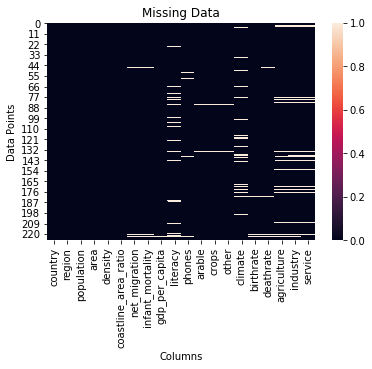

In [736]:
sns.heatmap(data.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')


When analysed I found that the attributes "agriculture","industry" and "service" had null values all together for 14 countries. On analysing the countries on the net, It was found that these countries were either very small nations or islands,which makes sense since they are small may be these activities are lesser compared to others. However, Greenland was an exception.

In [737]:
agri=data['agriculture'].isnull()
ind=data['industry'].isnull()
ser=data['service'].isnull()

print("**** Agriculture missing ****")
for i in range(len(data)):
    if agri[i]==True:
        print(data['country'][i])
print("\n")
print("**** industry missing ****")
for i in range(len(data)):
    if ind[i]==True:
        print(data['country'][i])
print("\n")
print("**** service missing ****")
for i in range(len(data)):
    if ser[i]==True:
        print(data['country'][i])
print("\n")
print("**** All three missing ****")
for i in range(len(data)):
    if ser[i]==True and agri[i]==True and ind[i]==True:
        print(data['country'][i])

**** Agriculture missing ****
American Samoa 
Andorra 
Gibraltar 
Greenland 
Guam 
Mayotte 
Montserrat 
Nauru 
N. Mariana Islands 
Saint Helena 
St Pierre & Miquelon 
San Marino 
Turks & Caicos Is 
Wallis and Futuna 
Western Sahara 


**** industry missing ****
American Samoa 
Andorra 
Gibraltar 
Greenland 
Guam 
Mayotte 
Monaco 
Montserrat 
Nauru 
N. Mariana Islands 
Saint Helena 
St Pierre & Miquelon 
San Marino 
Turks & Caicos Is 
Wallis and Futuna 
Western Sahara 


**** service missing ****
American Samoa 
Andorra 
Gibraltar 
Greenland 
Guam 
Mayotte 
Monaco 
Montserrat 
Nauru 
N. Mariana Islands 
Saint Helena 
St Pierre & Miquelon 
San Marino 
Turks & Caicos Is 
Wallis and Futuna 


**** All three missing ****
American Samoa 
Andorra 
Gibraltar 
Greenland 
Guam 
Mayotte 
Montserrat 
Nauru 
N. Mariana Islands 
Saint Helena 
St Pierre & Miquelon 
San Marino 
Turks & Caicos Is 
Wallis and Futuna 


Except Green land all the rest of them are smaller countries.
So looking at other smaller countries values for these attributes, we can fill the mean of them for null values of agriculture,industry and service. I have chose the values as 0.17 for Agriculture, 0.8 for industry and 0.05 for service.


In [738]:
for i in range(len(data)):
    if data['country'][i]== 'Greenland ':
        data['agriculture'][i]=data.groupby('region')['agriculture'].transform('median')[i]
        data['industry'][i]=data.groupby('region')['industry'].transform('median')[i]
        data['service'][i]=data.groupby('region')['service'].transform('median')[i]

data['net_migration'].fillna(0,inplace=True)
data['infant_mortality'].fillna(data.groupby('region')['infant_mortality'].transform('median'),inplace=True)
data['literacy'].fillna(data.groupby('region')['literacy'].transform('median'),inplace=True)
data['phones'].fillna(data.groupby('region')['phones'].transform('median'),inplace=True)
data['arable'].fillna(data.groupby('region')['arable'].transform('median'),inplace=True)
data['crops'].fillna(data.groupby('region')['crops'].transform('median'),inplace=True)
data['other'].fillna(data.groupby('region')['other'].transform('median'),inplace=True)

data['climate'].fillna(data.groupby('region')['climate'].transform('median'),inplace=True)

data['birthrate'].fillna(data.groupby('region')['birthrate'].transform('median'),inplace=True)
data['deathrate'].fillna(data.groupby('region')['deathrate'].transform('median'),inplace=True)

data['agriculture'].fillna(0.17,inplace=True)
data['industry'].fillna(0.8,inplace=True)
data['service'].fillna(0.05,inplace=True)


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Checking for missing values

In [739]:
data.isnull().sum()

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          1
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64

We will remove that one country whose gdp_per_capita is missing and we will find out its value with our regression model that we will develop later.

In [740]:
null=data['gdp_per_capita'].isnull()
for i in range(len(data)):
    if null[i]==True:
        print(data['country'][i])
        break
i

Western Sahara 


223

In [741]:
data.drop(223,0,inplace=True)

## EDA

#### Correlation heatmap

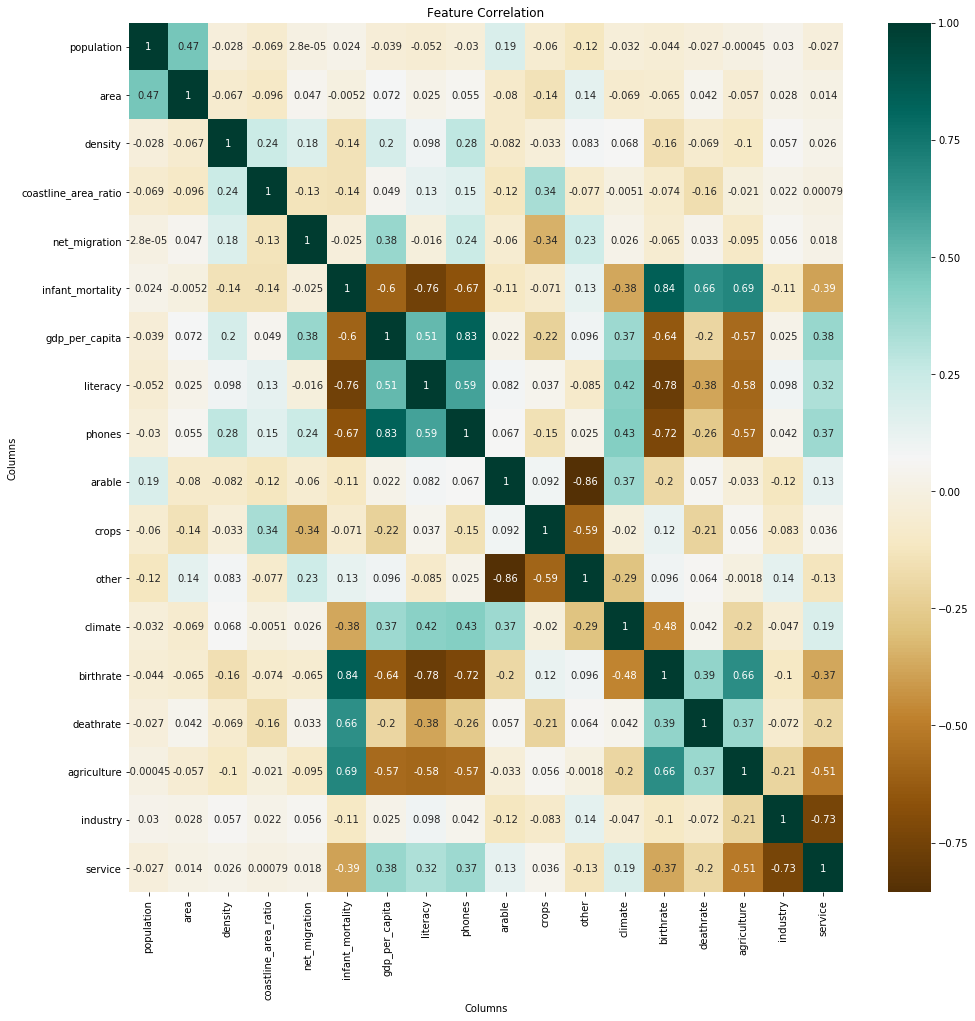

In [530]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

Some insights from heatmap of correlation

 1. Expected GDP and literacy will be correlated
 2. Expected GDP and Phones will be correlated
 3. Expected GDP and Deaths(infant_mortality and deathrate) will be negatively correlated
 4. Unexpected birthrate and phones are negatively correlated
 5. Expected phones and literacy are correlated
 6. Unexpected Agriculture and infant_moratality correlated
 7. Expected stronge correlation between birthrate and literacy (the less literacy the higher the birthrate) 

#### Pairwise plots

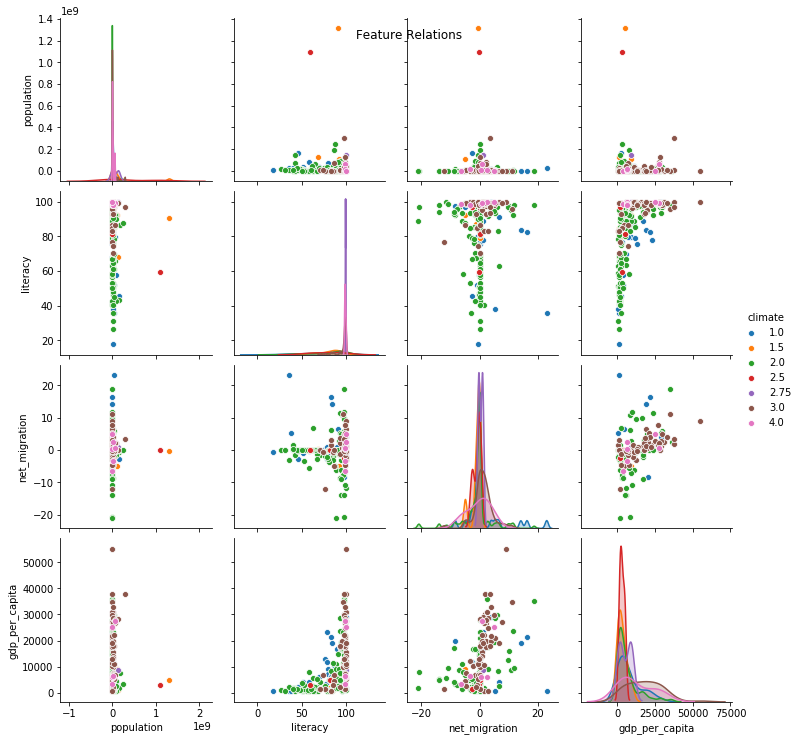

In [531]:
g = sns.pairplot(data[['population','literacy', 'net_migration', 'gdp_per_capita', 'climate']], hue='climate')
g.fig.suptitle('Feature Relations')
plt.show()

We can see a fair correlation between GDP and migration, which makes sense, since migrants tend to move to countries with better opportunities and higher GDP per capita. Similarily GDP and Literacy are correlated exponentialy.

#### Region wise plots

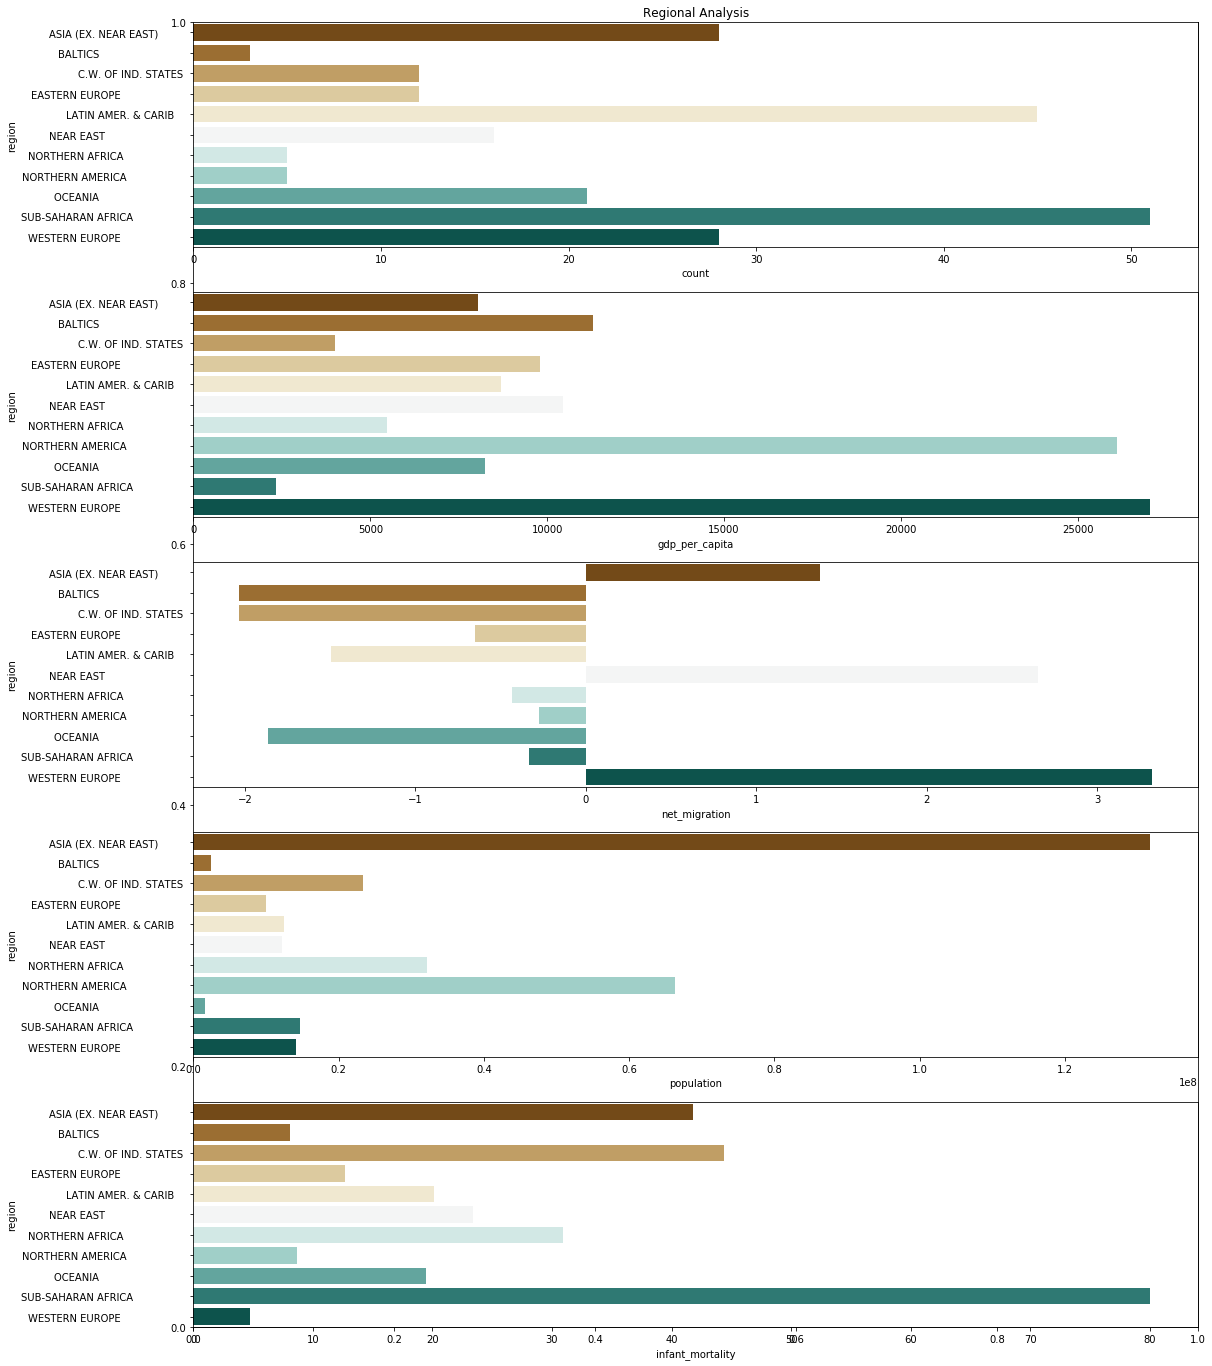

In [532]:
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(5, 1, 1)
ax2 = fig.add_subplot(5, 1, 2)
ax3 = fig.add_subplot(5, 1, 3)
ax4 = fig.add_subplot(5, 1, 4)
ax5 = fig.add_subplot(5, 1, 5)
sns.countplot(data= data, y= 'region', ax= ax1, palette='BrBG')
sns.barplot(data= data, y= 'region', x= 'gdp_per_capita', ax= ax2, palette='BrBG', ci= None)
sns.barplot(data= data, y= 'region', x= 'net_migration', ax= ax3, palette='BrBG', ci= None)
sns.barplot(data= data, y= 'region', x= 'population', ax= ax4, palette='BrBG', ci= None)
sns.barplot(data= data, y= 'region', x= 'infant_mortality', ax= ax5, palette='BrBG', ci= None)

plt.show()

#### Average GDP Analysis region wise

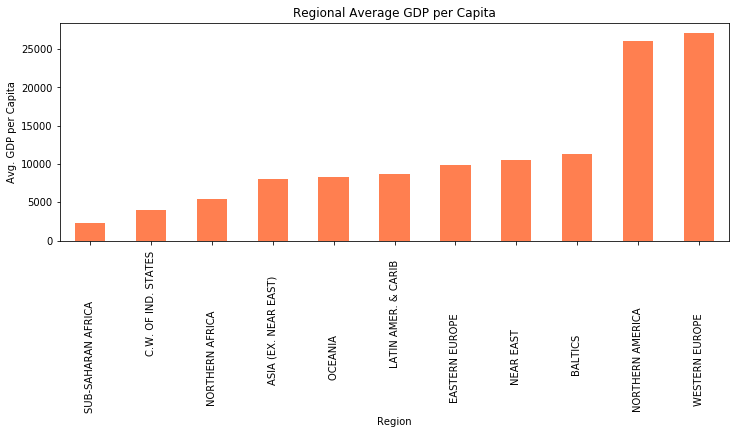

In [533]:
fig = plt.figure(figsize=(12, 4))
data.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()

#### Transforming the numerical features

In [534]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #df[variable].hist()
    sns.distplot(df[variable],fit=norm)
    (mu,sigma)=norm.fit(df[variable])
    plt.ylabel('Frequency')
    plt.title(f'{variable}'.format(variable))

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

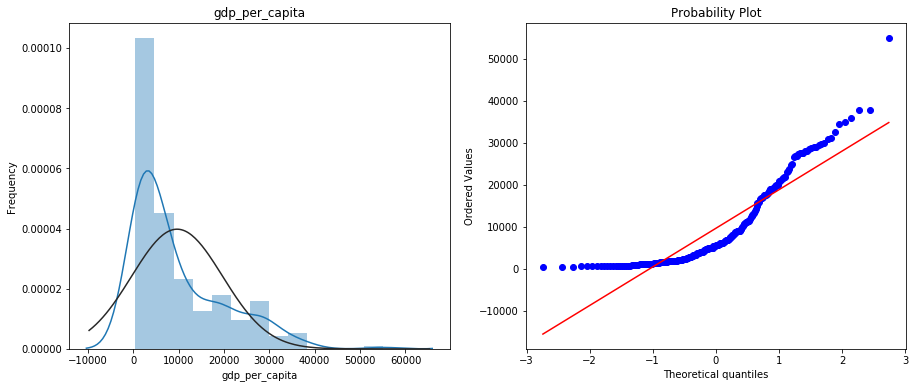

In [535]:
diagnostic_plots(data,'gdp_per_capita')

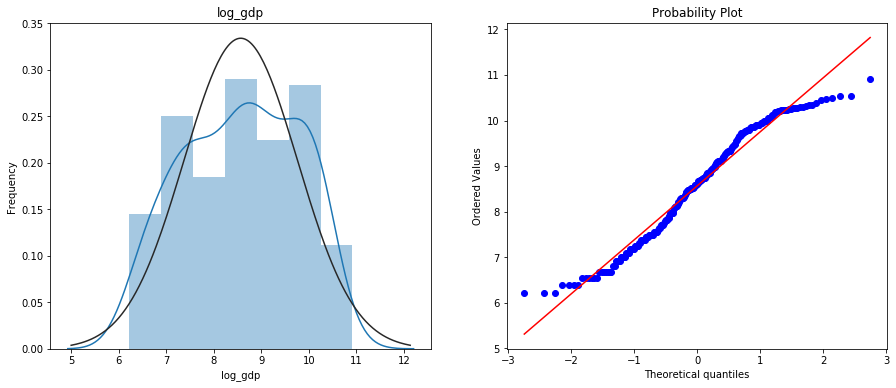

In [536]:
data['log_gdp']=np.log(data['gdp_per_capita'])
diagnostic_plots(data,'log_gdp')

In [537]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               226 non-null    category
 1   region                226 non-null    category
 2   population            226 non-null    float64 
 3   area                  226 non-null    float64 
 4   density               226 non-null    float64 
 5   coastline_area_ratio  226 non-null    float64 
 6   net_migration         226 non-null    float64 
 7   infant_mortality      226 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              226 non-null    float64 
 10  phones                226 non-null    float64 
 11  arable                226 non-null    float64 
 12  crops                 226 non-null    float64 
 13  other                 226 non-null    float64 
 14  climate               226 non-null    float64 
 15  birthr

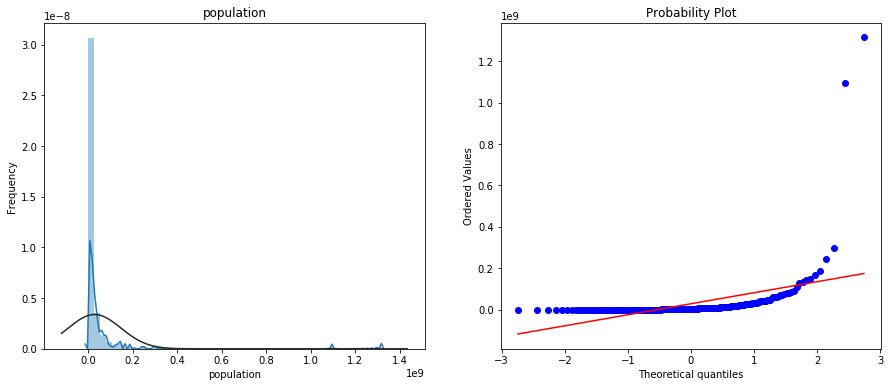

In [538]:
diagnostic_plots(data,'population')

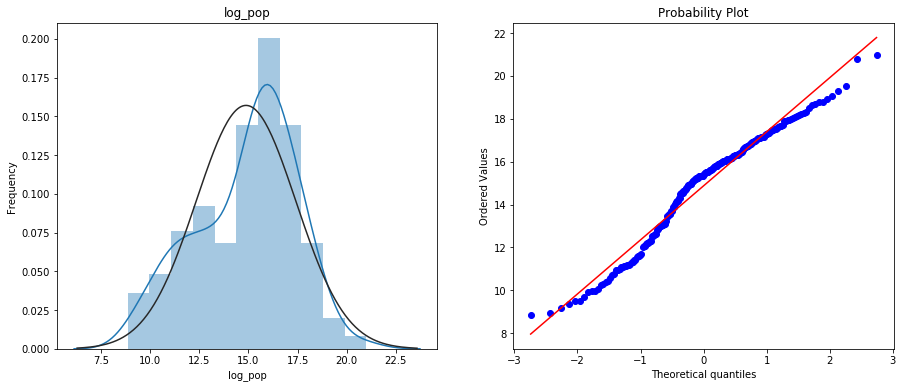

In [539]:
data['log_pop']=np.log(data['population'])
diagnostic_plots(data,'log_pop')

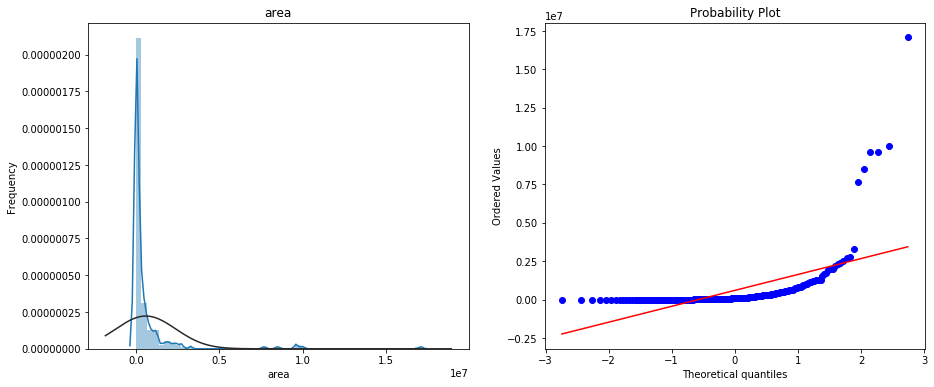

In [540]:

diagnostic_plots(data,'area')

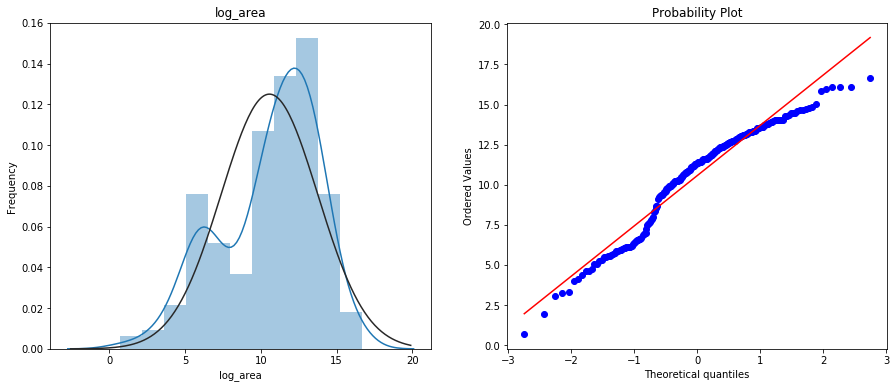

In [541]:
data['log_area']=np.log(data['area'])
diagnostic_plots(data,'log_area')

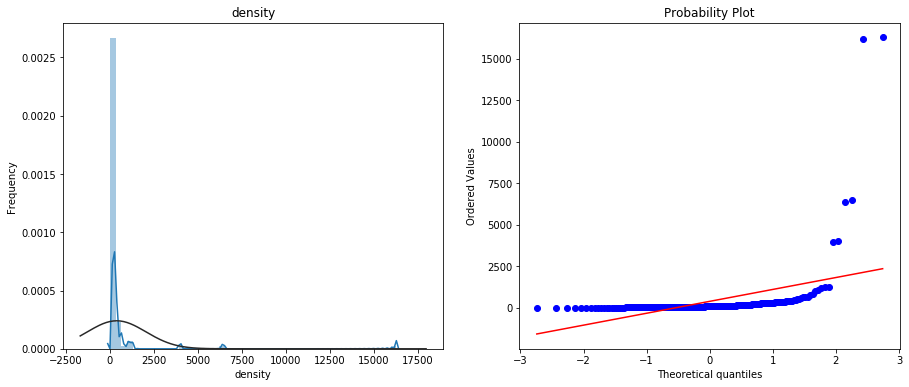

In [542]:
diagnostic_plots(data,'density')

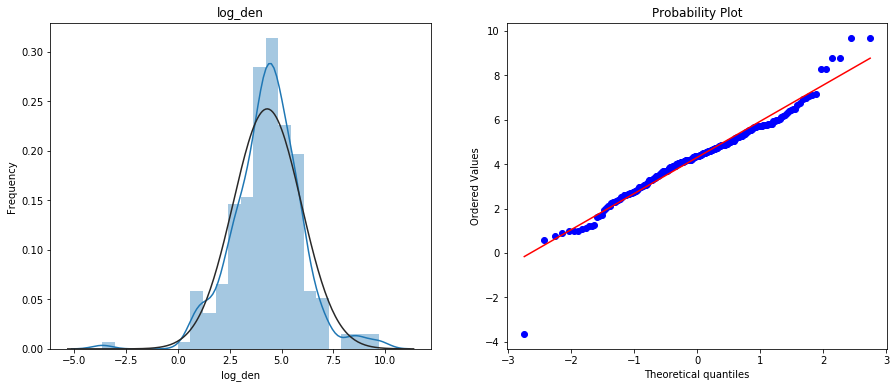

In [543]:
data['log_den']=np.log(data['population']/data['area'])
diagnostic_plots(data,'log_den')

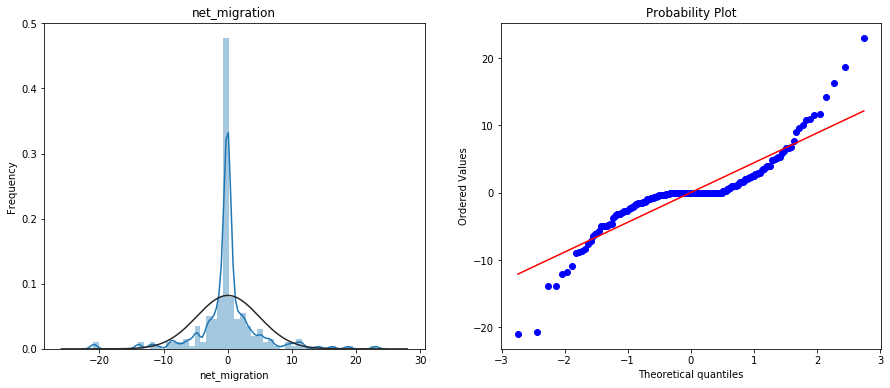

In [544]:
diagnostic_plots(data,'net_migration')

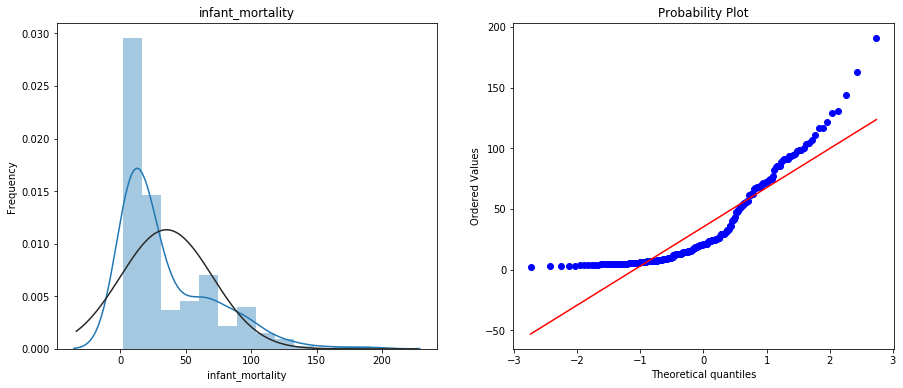

In [545]:
diagnostic_plots(data,'infant_mortality')

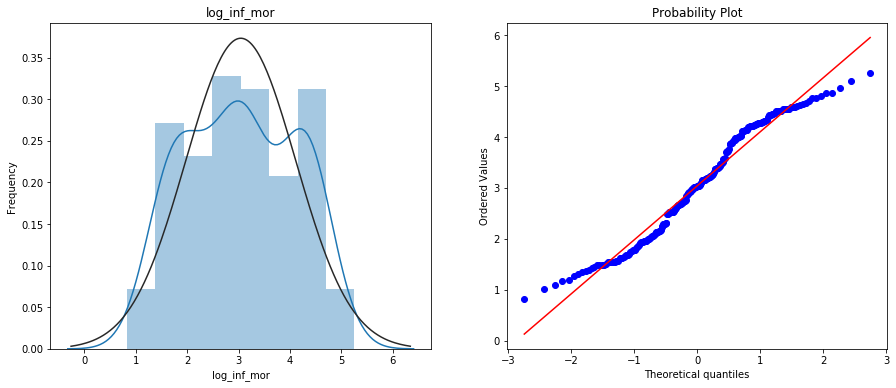

In [546]:
data['log_inf_mor']=np.log(data['infant_mortality'])
diagnostic_plots(data,'log_inf_mor')

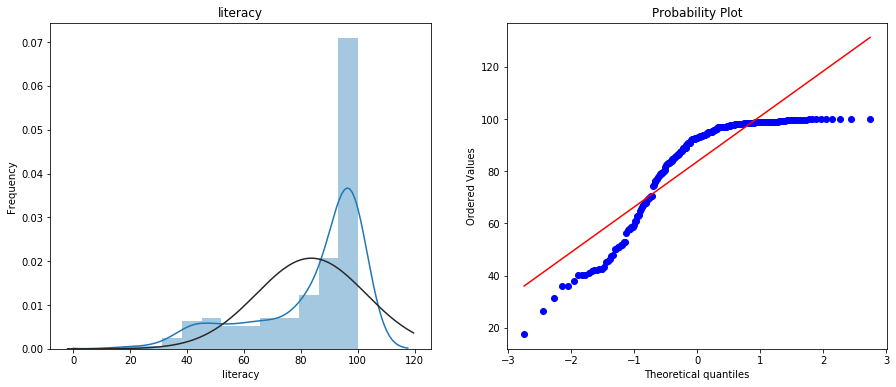

In [547]:
diagnostic_plots(data,'literacy')
#Tried using higher powers, didnt get well , so leaving it as it is.

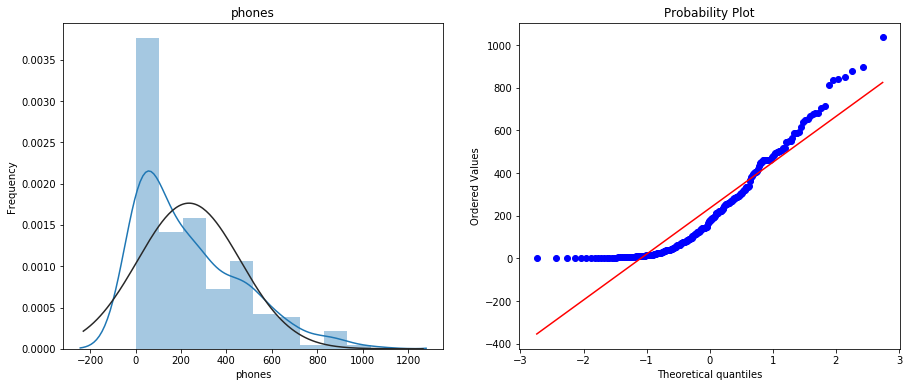

In [548]:
diagnostic_plots(data,'phones')

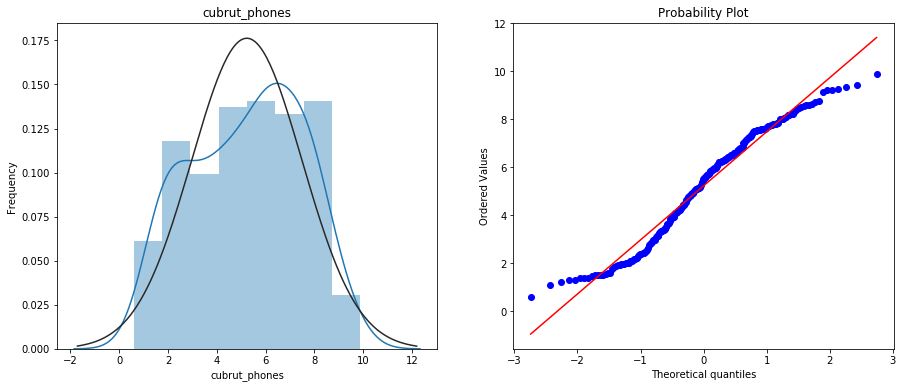

In [549]:
data['cubrut_phones']=(data['phones'])**(0.33)
diagnostic_plots(data,'cubrut_phones')

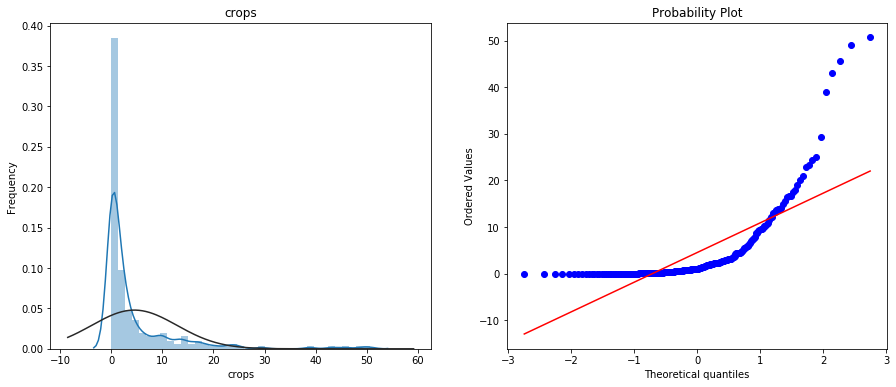

In [550]:
diagnostic_plots(data,'crops')

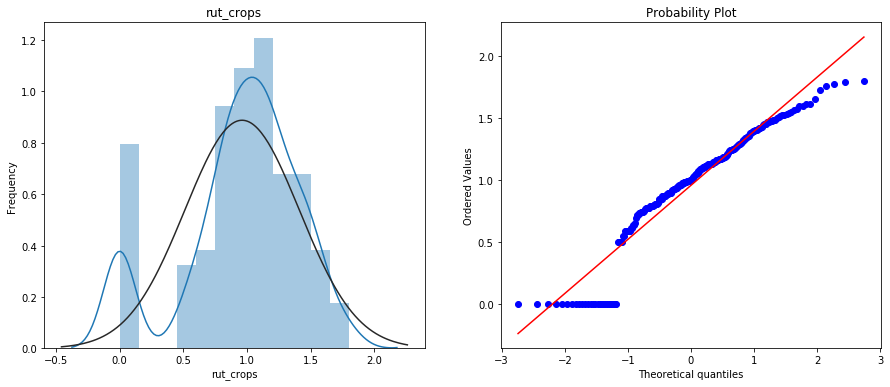

In [551]:
data['rut_crops']=((data['crops'])**(0.15))
diagnostic_plots(data,'rut_crops')


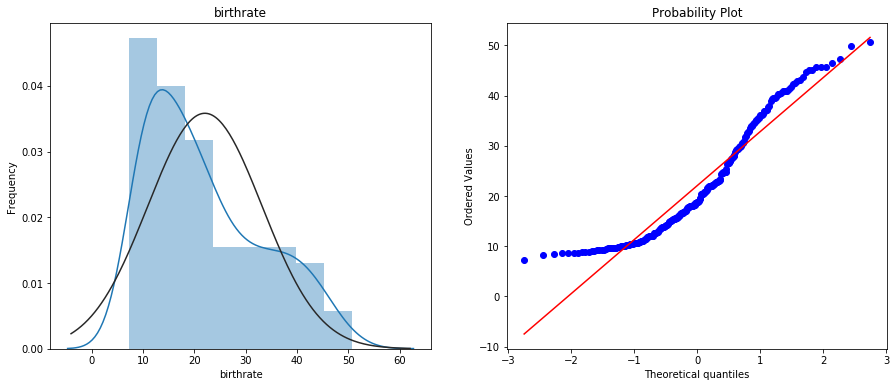

In [552]:

diagnostic_plots(data,'birthrate')

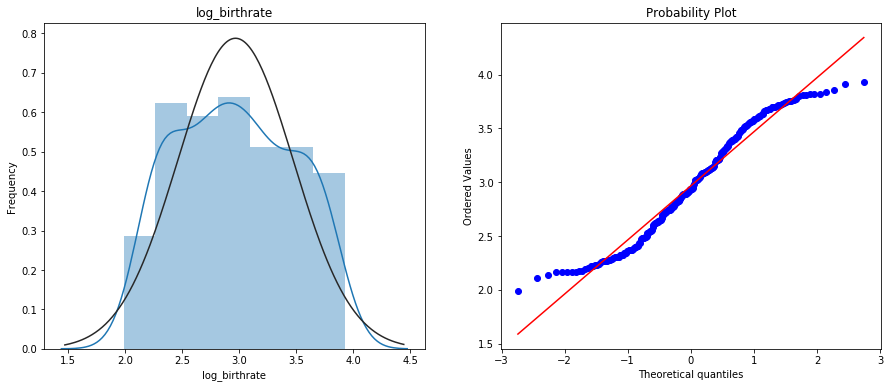

In [553]:
data['log_birthrate']=np.log(data['birthrate'])
diagnostic_plots(data,'log_birthrate')

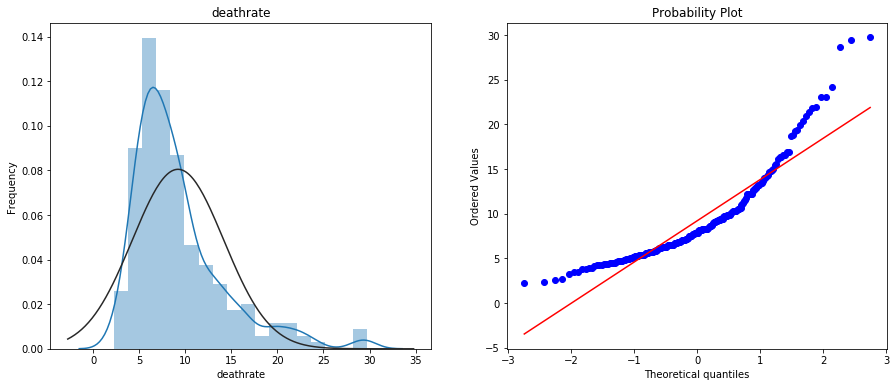

In [554]:

diagnostic_plots(data,'deathrate')

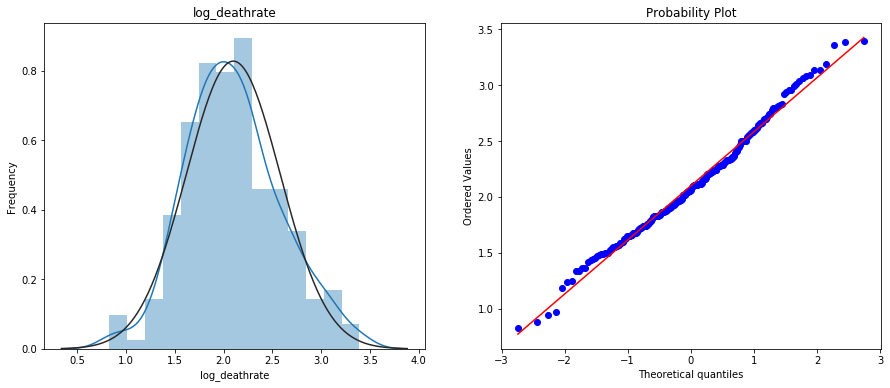

In [555]:
data['log_deathrate']=np.log(data['deathrate'])
diagnostic_plots(data,'log_deathrate')

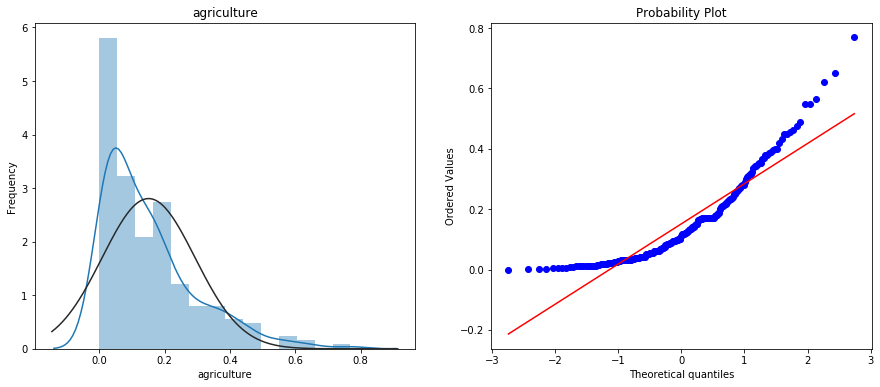

In [556]:
diagnostic_plots(data,'agriculture')

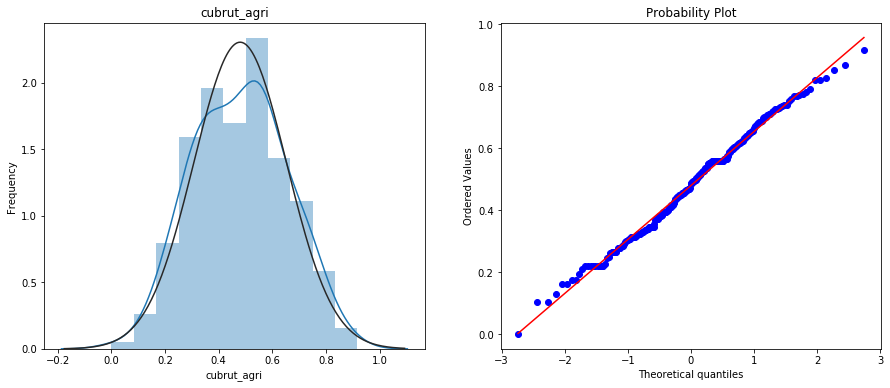

In [557]:
data['cubrut_agri']=(data['agriculture'])**(0.33)
diagnostic_plots(data,'cubrut_agri')

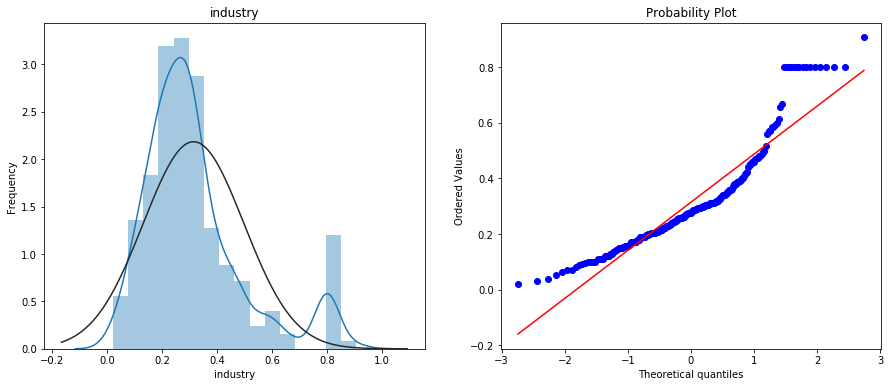

In [558]:

diagnostic_plots(data,'industry')

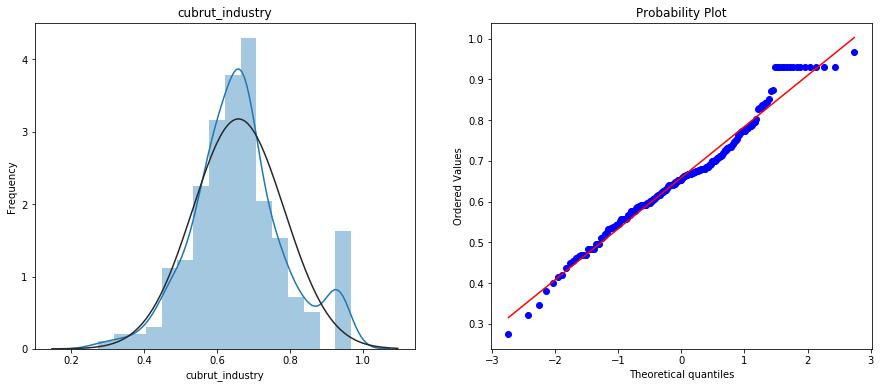

In [559]:
data['cubrut_industry']=(data['industry'])**(0.33)
diagnostic_plots(data,'cubrut_industry')

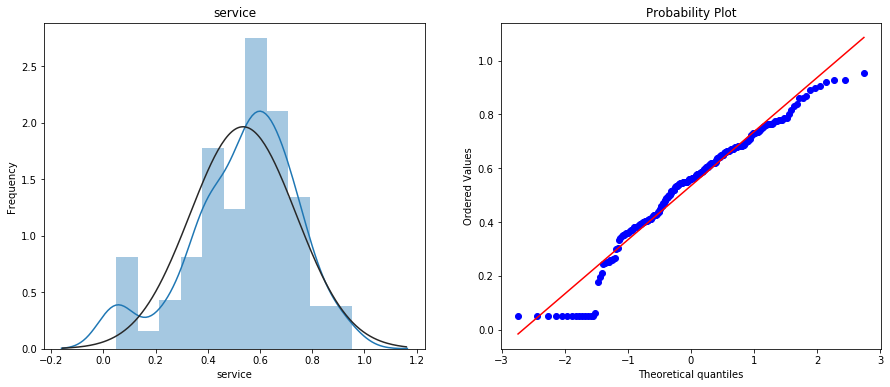

In [560]:
diagnostic_plots(data,'service')

In [687]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               226 non-null    category
 1   region                226 non-null    category
 2   population            226 non-null    float64 
 3   area                  226 non-null    float64 
 4   density               226 non-null    float64 
 5   coastline_area_ratio  226 non-null    float64 
 6   net_migration         226 non-null    float64 
 7   infant_mortality      226 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              226 non-null    float64 
 10  phones                226 non-null    float64 
 11  arable                226 non-null    float64 
 12  crops                 226 non-null    float64 
 13  other                 226 non-null    float64 
 14  climate               226 non-null    float64 
 15  birthr

#### Creating new data with transformed variable

I have dropped attributes "coastline_area_ratio", "arable" and "other" since they have almost 0 correlation with gdp.


In [620]:
newdata=pd.DataFrame()
newdata=data.loc[:,['log_gdp','country','region','log_pop','log_area','log_den','net_migration','climate','log_inf_mor','literacy','cubrut_phones','rut_crops','log_birthrate','log_deathrate','cubrut_agri','cubrut_industry','service']]

In [621]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   log_gdp          226 non-null    float64 
 1   country          226 non-null    category
 2   region           226 non-null    category
 3   log_pop          226 non-null    float64 
 4   log_area         226 non-null    float64 
 5   log_den          226 non-null    float64 
 6   net_migration    226 non-null    float64 
 7   climate          226 non-null    float64 
 8   log_inf_mor      226 non-null    float64 
 9   literacy         226 non-null    float64 
 10  cubrut_phones    226 non-null    float64 
 11  rut_crops        226 non-null    float64 
 12  log_birthrate    226 non-null    float64 
 13  log_deathrate    226 non-null    float64 
 14  cubrut_agri      226 non-null    float64 
 15  cubrut_industry  226 non-null    float64 
 16  service          226 non-null    float64 
dt

In [622]:
newdata.head()

,log_gdp,country,region,log_pop,log_area,log_den,net_migration,climate,log_inf_mor,literacy,cubrut_phones,rut_crops,log_birthrate,log_deathrate,cubrut_agri,cubrut_industry,service
0,6.551080,Afghanistan,ASIA (EX. NEAR EAST),17.251335,13.380874,3.870461,23.06,1.0,5.094180,36.0,1.467910,0.796826,3.841601,3.012589,0.726656,0.624410,0.380
1,8.411833,Albania,EASTERN EUROPE,15.091336,10.266323,4.825012,-4.93,3.0,3.068983,86.5,4.086189,1.249722,2.715357,1.652497,0.617463,0.576066,0.579
2,8.699515,Algeria,NORTHERN AFRICA,17.309897,14.683342,2.626556,-0.39,1.0,3.433987,70.0,4.212839,0.812252,2.841415,1.528228,0.469274,0.844870,0.298
3,8.987197,American Samoa,OCEANIA,10.964640,5.293305,5.671335,-20.71,2.0,2.226783,97.0,6.261312,1.501114,3.111736,1.184790,0.557248,0.929009,0.050
4,9.852194,Andorra,WESTERN EUROPE,11.173262,6.148468,5.024794,6.60,3.0,1.398717,100.0,7.759885,0.000000,2.164472,1.832581,0.557248,0.929009,0.050


#### One Hot Encoding the categorical features

Lets check the values of climate once

In [623]:
h1 = data.loc[:, ['country', 'region', 'climate']][data.climate == 1].head()
h2 = data.loc[:, ['country', 'region', 'climate']][data.climate == 2].head()
h3 = data.loc[:, ['country', 'region', 'climate']][data.climate == 3].head()
h4 = data.loc[:, ['country', 'region', 'climate']][data.climate == 4].head()
h5 = data.loc[:, ['country', 'region', 'climate']][data.climate == 1.5].head()
h6 = data.loc[:, ['country', 'region', 'climate']][data.climate == 2.5].head()
pd.concat([h1, h2, h3, h4, h5, h6])

,country,region,climate
0,Afghanistan,ASIA (EX. NEAR EAST),1.0
2,Algeria,NORTHERN AFRICA,1.0
11,Australia,OCEANIA,1.0
13,Azerbaijan,C.W. OF IND. STATES,1.0
15,Bahrain,NEAR EAST,1.0
3,American Samoa,OCEANIA,2.0
5,Angola,SUB-SAHARAN AFRICA,2.0
6,Anguilla,LATIN AMER. & CARIB,2.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,2.0
10,Aruba,LATIN AMER. & CARIB,2.0


1. Climate value when it is 3 or 4, we observe that all countries are mostly cold countries.
2. Climate value when it is 1, I guess mostly it is hotter countries, though I am not sure why Australia is having value 1.


So basically climate is serving as an categorical entity ,but we are not able to get exact meanings of what this values , since they were pre-encoded. So I will be applying one hot encoding for climate as well.

In [624]:
reg=pd.get_dummies(data['region'], prefix='region')
climate=pd.get_dummies(data['climate'], prefix='climate')

In [625]:
newdata.drop(['country','region','climate'],1,inplace=True)

In [626]:
newdata=pd.concat([newdata,reg],1)
newdata=pd.concat([newdata,climate],1)

In [627]:
newdata.head()

,log_gdp,log_pop,log_area,log_den,net_migration,log_inf_mor,literacy,cubrut_phones,rut_crops,log_birthrate,...,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE,climate_1.0,climate_1.5,climate_2.0,climate_2.5,climate_2.75,climate_3.0,climate_4.0
0,6.551080,17.251335,13.380874,3.870461,23.06,5.094180,36.0,1.467910,0.796826,3.841601,...,0,0,0,1,0,0,0,0,0,0
1,8.411833,15.091336,10.266323,4.825012,-4.93,3.068983,86.5,4.086189,1.249722,2.715357,...,0,0,0,0,0,0,0,0,1,0
2,8.699515,17.309897,14.683342,2.626556,-0.39,3.433987,70.0,4.212839,0.812252,2.841415,...,0,0,0,1,0,0,0,0,0,0
3,8.987197,10.964640,5.293305,5.671335,-20.71,2.226783,97.0,6.261312,1.501114,3.111736,...,1,0,0,0,0,1,0,0,0,0
4,9.852194,11.173262,6.148468,5.024794,6.60,1.398717,100.0,7.759885,0.000000,2.164472,...,0,0,1,0,0,0,0,0,1,0


In [628]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   log_gdp                                     226 non-null    float64
 1   log_pop                                     226 non-null    float64
 2   log_area                                    226 non-null    float64
 3   log_den                                     226 non-null    float64
 4   net_migration                               226 non-null    float64
 5   log_inf_mor                                 226 non-null    float64
 6   literacy                                    226 non-null    float64
 7   cubrut_phones                               226 non-null    float64
 8   rut_crops                                   226 non-null    float64
 9   log_birthrate                               226 non-null    float64
 10  log_deathrate 

#### Scaling the numerical features

In [629]:
num_cols=[]
from sklearn.pipeline import make_pipeline
for col in newdata.columns:
    if newdata[col].dtype=='float64' and not col=='log_gdp':
        num_cols.append(str(col))

Using make_column_transformer for scaling only numerical features

In [688]:
ct=make_column_transformer((StandardScaler(),num_cols),remainder='passthrough')

In [710]:
X_unscaled=newdata.drop(['log_gdp'],1)
y=pd.DataFrame(newdata['log_gdp'],columns=['log_gdp'])

In [711]:
X=ct.fit_transform(X_unscaled)
X=pd.DataFrame(X,columns=X_unscaled.columns)

## Cross Validation

### Linear Regression

In [712]:
err_lr_mae = []
err_lr_rmse = []
err_lr_r2 = []

fold = KFold(n_splits=7, shuffle=True, random_state=42)
f = 0

for train_index, test_index in fold.split(X,y):
    f += 1
    print('*'*30+'Fold '+str(f)+'*'*30)
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    
    y_pred = lr.predict(X_test)
    
    err_mae = metrics.mean_absolute_error(y_test, y_pred)
    err_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    err_r2 = metrics.r2_score(y_test, y_pred)
    
    err_lr_mae.append(err_mae)
    err_lr_rmse.append(err_rmse)
    err_lr_r2.append(err_r2)
    
    print("Mean Absolute Error:", err_mae)
    print('Root Mean Squared Error:', err_rmse)
    print("R2 Score:", err_r2)

******************************Fold 1******************************
Mean Absolute Error: 0.3204717144242259
Root Mean Squared Error: 0.4056465497111147
R2 Score: 0.8443539835423124
******************************Fold 2******************************
Mean Absolute Error: 0.4343093438415539
Root Mean Squared Error: 0.559191845240423
R2 Score: 0.8258244317421859
******************************Fold 3******************************
Mean Absolute Error: 0.4024898176259094
Root Mean Squared Error: 0.5077357937432013
R2 Score: 0.8115535320948316
******************************Fold 4******************************
Mean Absolute Error: 0.3185158154805645
Root Mean Squared Error: 0.42771320283166026
R2 Score: 0.8787127289927098
******************************Fold 5******************************
Mean Absolute Error: 0.3050598395336046
Root Mean Squared Error: 0.4464668123021218
R2 Score: 0.8222159955634263
******************************Fold 6******************************
Mean Absolute Error: 0.3624839432

In [713]:
print(np.mean(err_lr_mae))
print(np.mean(err_lr_rmse))
print(np.mean(err_lr_r2))

0.3663439496606678
0.49201259941938774
0.8264884610715664


### Stochastic Gradient Descent Regressor

In [714]:
err_sgd_mae = []
err_sgd_rmse = []
err_sgd_r2 = []


fold = KFold(n_splits=7, shuffle=True, random_state=42)
f = 0

for train_index, test_index in fold.split(X,y):
    f += 1
    print('*'*30+'Fold '+str(f)+'*'*30)
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3, penalty=None, eta0=0.06)
    sgd_reg.fit(X_train,y_train)
    
    y_pred = sgd_reg.predict(X_test)
    
    err_mae = metrics.mean_absolute_error(y_test, y_pred)
    err_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    err_r2 = metrics.r2_score(y_test, y_pred)
    
    err_sgd_mae.append(err_mae)
    err_sgd_rmse.append(err_rmse)
    err_sgd_r2.append(err_r2)
    
    print("Mean Absolute Error:", err_mae)
    print('Root Mean Squared Error:', err_rmse)
    print("R2 Score:", err_r2)

******************************Fold 1******************************
Mean Absolute Error: 0.3153886163861564
Root Mean Squared Error: 0.39339312420413425
R2 Score: 0.8536152055598105
******************************Fold 2******************************
Mean Absolute Error: 0.47699086235494226
Root Mean Squared Error: 0.6160848540440187
R2 Score: 0.7885797210194142
******************************Fold 3******************************
Mean Absolute Error: 0.381989762162002
Root Mean Squared Error: 0.5014554809060185
R2 Score: 0.816186584414532
******************************Fold 4******************************
Mean Absolute Error: 0.3354511614211906
Root Mean Squared Error: 0.4400012516336754
R2 Score: 0.8716435387221751
******************************Fold 5******************************
Mean Absolute Error: 0.3404604173582403
Root Mean Squared Error: 0.5077354363794475
R2 Score: 0.770073371385554
******************************Fold 6******************************
Mean Absolute Error: 0.35957069180

/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d arr

In [715]:
print(np.mean(err_sgd_mae))
print(np.mean(err_sgd_rmse))
print(np.mean(err_sgd_r2))

0.3754564118297853
0.5046326948795733
0.817116228628513


### SVM

In [716]:
err_svm_mae = []
err_svm_rmse = []
err_svm_r2 = []


fold = KFold(n_splits=7, shuffle=True, random_state=42)
f = 0

for train_index, test_index in fold.split(X,y):
    f += 1
    print('*'*30+'Fold '+str(f)+'*'*30)
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm1 = SVR(C=100,kernel='rbf')
    svm1.fit(X_train,y_train)  
    
    y_pred = svm1.predict(X_test)
    
    err_mae = metrics.mean_absolute_error(y_test, y_pred)
    err_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    err_r2 = metrics.r2_score(y_test, y_pred)
    
    err_svm_mae.append(err_mae)
    err_svm_rmse.append(err_rmse)
    err_svm_r2.append(err_r2)
    
    print("Mean Absolute Error:", err_mae)
    print('Root Mean Squared Error:', err_rmse)
    print("R2 Score:", err_r2)

******************************Fold 1******************************
Mean Absolute Error: 0.3701105287643095
Root Mean Squared Error: 0.4623027917009683
R2 Score: 0.7978398881085748
******************************Fold 2******************************
Mean Absolute Error: 0.5141607511011845
Root Mean Squared Error: 0.6627360505645263
R2 Score: 0.7553491280166131
******************************Fold 3******************************
Mean Absolute Error: 0.3377358109371869
Root Mean Squared Error: 0.4620092073327731
R2 Score: 0.8439679906165114
******************************Fold 4******************************
Mean Absolute Error: 0.45171287712123925
Root Mean Squared Error: 0.5602207813644737
R2 Score: 0.7919209571932313
******************************Fold 5******************************
Mean Absolute Error: 0.3703912824950586
Root Mean Squared Error: 0.527251794839756
R2 Score: 0.7520577975814009
******************************Fold 6******************************
Mean Absolute Error: 0.3915605339

/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d arr

In [717]:
print(np.mean(err_svm_mae))
print(np.mean(err_svm_rmse))
print(np.mean(err_svm_r2))

0.41128175044828097
0.5368231802059515
0.793296702161076


### Random Forest

In [718]:
err_rf_mae = []
err_rf_rmse = []
err_rf_r2 = []


fold = KFold(n_splits=7, shuffle=True, random_state=42)
f = 0

for train_index, test_index in fold.split(X,y):
    f += 1
    print('*'*30+'Fold '+str(f)+'*'*30)
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf = RandomForestRegressor(random_state=101, n_estimators=150)
    rf.fit(X_train,y_train)  
    
    y_pred = rf.predict(X_test)
    
    err_mae = metrics.mean_absolute_error(y_test, y_pred)
    err_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    err_r2 = metrics.r2_score(y_test, y_pred)
    
    err_rf_mae.append(err_mae)
    err_rf_rmse.append(err_rmse)
    err_rf_r2.append(err_r2)
    
    print("Mean Absolute Error:", err_mae)
    print('Root Mean Squared Error:', err_rmse)
    print("R2 Score:", err_r2)

******************************Fold 1******************************


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2935407051408085
Root Mean Squared Error: 0.3750846389573093
R2 Score: 0.8669236150966929
******************************Fold 2******************************


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3631668372802233
Root Mean Squared Error: 0.45633538694517584
R2 Score: 0.8840064412705873
******************************Fold 3******************************


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.37806284717032546
Root Mean Squared Error: 0.49214066422478375
R2 Score: 0.8229520338146312
******************************Fold 4******************************


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3000827395996657
Root Mean Squared Error: 0.37989677744108336
R2 Score: 0.9043156015961694
******************************Fold 5******************************


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3021920662195611
Root Mean Squared Error: 0.4153268020668765
R2 Score: 0.8461511560477549
******************************Fold 6******************************


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.40420717055422856
Root Mean Squared Error: 0.6253958252172549
R2 Score: 0.7297374447005311
******************************Fold 7******************************


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.4234184839196515
Root Mean Squared Error: 0.6832837821715007
R2 Score: 0.7053911827895987


In [719]:
print(np.mean(err_rf_mae))
print(np.mean(err_rf_rmse))
print(np.mean(err_rf_r2))

0.3520958356977806
0.489637696717712
0.8227824964737093


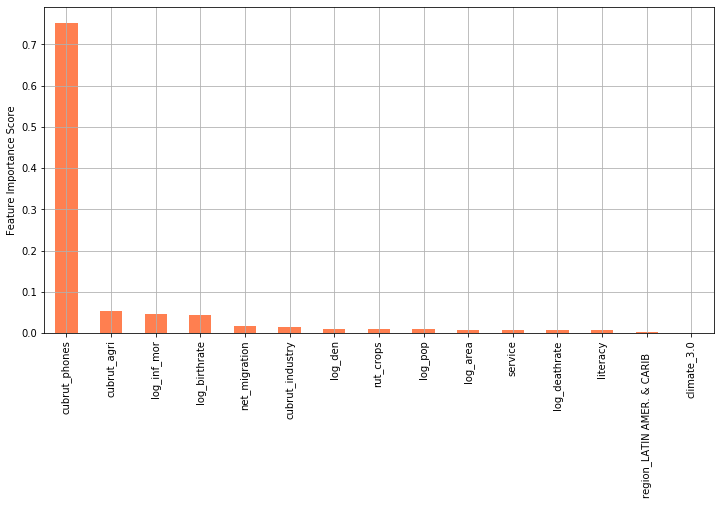

In [720]:
X_trainpd=pd.DataFrame(X_train,columns=newdata.drop(['log_gdp'],1).columns)
fig = plt.figure(figsize=(12, 6))
feat_importances = pd.Series(rf.feature_importances_, index=X_trainpd.columns)
feat_importances.nlargest(15).plot(kind='bar',color='coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

### XGBoost

In [721]:
err_xgb_mae = []
err_xgb_rmse = []
err_xgb_r2 = []


fold = KFold(n_splits=7, shuffle=True, random_state=42)
f = 0

for train_index, test_index in fold.split(X,y):
    f += 1
    print('*'*30+'Fold '+str(f)+'*'*30)
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb=XGBRegressor(n_estimators=400,max_depth=5,objective='reg:squarederror',learning_rate=0.05)
    xgb.fit(X_train,y_train)
    
    y_pred = xgb.predict(X_test)
    
    err_mae = metrics.mean_absolute_error(y_test, y_pred)
    err_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    err_r2 = metrics.r2_score(y_test, y_pred)
    
    err_xgb_mae.append(err_mae)
    err_xgb_rmse.append(err_rmse)
    err_xgb_r2.append(err_r2)
    
    print("Mean Absolute Error:", err_mae)
    print('Root Mean Squared Error:', err_rmse)
    print("R2 Score:", err_r2)

******************************Fold 1******************************
Mean Absolute Error: 0.3642537753931486
Root Mean Squared Error: 0.4785036038427109
R2 Score: 0.7834227358696099
******************************Fold 2******************************
Mean Absolute Error: 0.3456207358948862
Root Mean Squared Error: 0.44303473759205375
R2 Score: 0.8906695496674139
******************************Fold 3******************************
Mean Absolute Error: 0.39505914905448863
Root Mean Squared Error: 0.5069771310655771
R2 Score: 0.8121162676446049
******************************Fold 4******************************
Mean Absolute Error: 0.29985220335200724
Root Mean Squared Error: 0.38072502046304485
R2 Score: 0.903897928535871
******************************Fold 5******************************
Mean Absolute Error: 0.3400087457337534
Root Mean Squared Error: 0.43633345627814957
R2 Score: 0.8301946577753814
******************************Fold 6******************************
Mean Absolute Error: 0.348328

In [722]:
print(np.mean(err_xgb_mae))
print(np.mean(err_xgb_rmse))
print(np.mean(err_xgb_r2))

0.3572660773680769
0.47540445296842687
0.8332127481814264


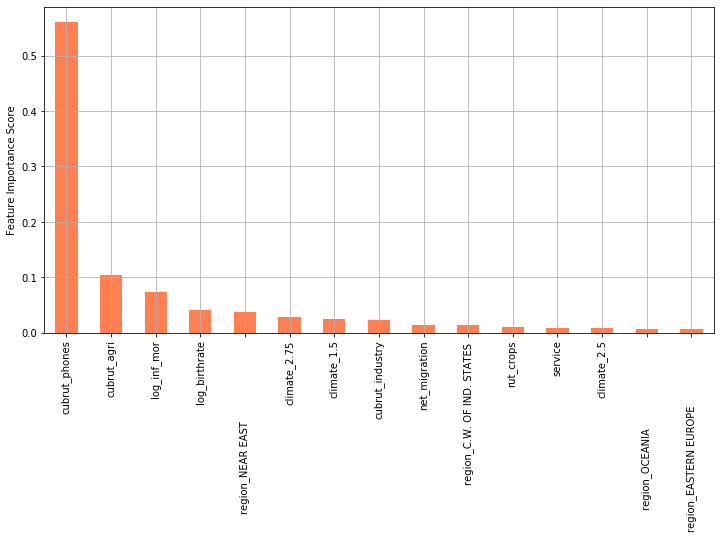

In [723]:
X_trainpd=pd.DataFrame(X_train,columns=newdata.drop(['log_gdp'],1).columns)
fig = plt.figure(figsize=(12, 6))
feat_importances = pd.Series(xgb.feature_importances_, index=X_trainpd.columns)
feat_importances.nlargest(15).plot(kind='bar',color='coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [770]:
lr=["Linear Regression",np.mean(err_lr_mae),np.mean(err_lr_rmse),np.mean(err_lr_r2)]
sgd=["SGD Regressor",np.mean(err_sgd_mae),np.mean(err_sgd_rmse),np.mean(err_sgd_r2)]
svm=["SVM",np.mean(err_svm_mae),np.mean(err_svm_rmse),np.mean(err_svm_r2)]
rf=["Random Forest",np.mean(err_rf_mae),np.mean(err_rf_rmse),np.mean(err_rf_r2)]
xgb=["XGBoost ",np.mean(err_xgb_mae),np.mean(err_xgb_rmse),np.mean(err_xgb_r2)]
p1=pd.DataFrame(lr).T
p2=pd.DataFrame(sgd).T
p3=pd.DataFrame(svm).T
p4=pd.DataFrame(rf).T
p5=pd.DataFrame(xgb).T

In [776]:
result=pd.concat([p1,p2,p3,p4,p5])
result

,0,1,2,3
0,Linear Regression,0.366344,0.492013,0.826488
0,SGD Regressor,0.375456,0.504633,0.817116
0,SVM,0.411282,0.536823,0.793297
0,Random Forest,0.352096,0.489638,0.822782
0,XGBoost,0.357266,0.475404,0.833213


In [779]:
result.columns=['Model','MAE','RMSE','R2_score']

# Conclusion

In this project, we used countries_of_the_world dataset to build a <b>GDP</b> predictor. 5 different learning regressors (Linear Regression,SGD, SVM, Random Forest, and XGBoost) were tested, and we have acheived the best prediction performance using XGBoost on an average from the 7 Fold cross- validation, followed by Linear Regression, and then Random Forest , while SVM acheived the worst performance of the 5.



The best prediction performance was acheived using <b>XGBoost regressor</b>, using all features in the dataset, and resulted in the following metrics:

- Mean Absolute Error  <b> (MAE)</b> :0.3572660773680769
- Root mean Squared Error  <b>(RMSE)</b> :0.47540445296842687
- R-squared Score  <b>(R2_score)</b> :0.8332127481814264

In [778]:
result

,Model,MAE,RMSE,R2_score
0,Linear Regression,0.366344,0.492013,0.826488
0,SGD Regressor,0.375456,0.504633,0.817116
0,SVM,0.411282,0.536823,0.793297
0,Random Forest,0.352096,0.489638,0.822782
0,XGBoost,0.357266,0.475404,0.833213


When time permits I will try performing Hyper parameter tuninng for the models to acheive better performance.